Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [ ]:
#Checking head 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Preprocessing

In [ ]:
data.info()
df=data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for Null Values in the data set

In [ ]:
data.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


No null values

In [ ]:
#Compute basic values about the continuous attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.The statistics look reasonable

2.The age column shows that the data refers to an adult population

3.The number of people with more than two children is very low

4.The charges look highly skewed less number of people will require expensive treatements relating to serious diseases

EDA

Text(0.5, 0, 'charges')

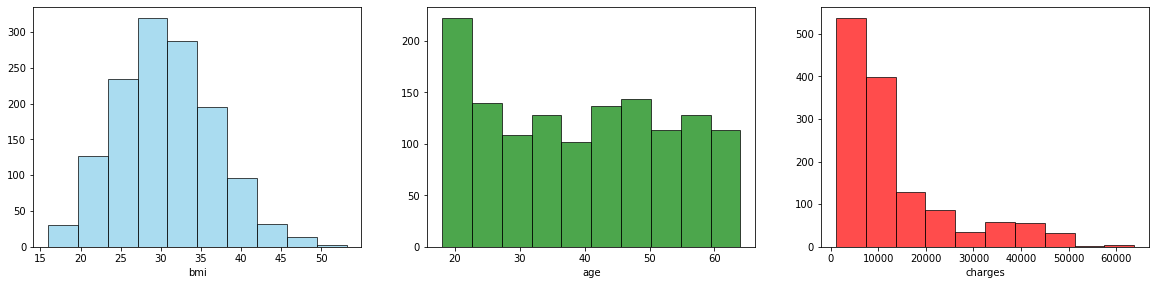

In [ ]:
#Checking for the Distribution of the data
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.bmi, color='skyblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(data.age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data.charges, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

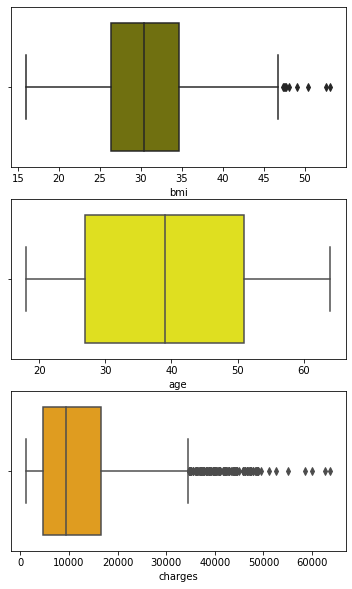

In [ ]:
plt.figure(figsize= (6,10))
plt.subplot(3,1,1)
sns.boxplot(x= df.bmi, color='olive')

plt.subplot(3,1,2)
sns.boxplot(x= df.age, color='yellow')

plt.subplot(3,1,3)
sns.boxplot(x= df.charges, color='orange')

plt.show()

1.The Box plot for bmi has very few outliers

2.The box plot for charge has realatively more number of outliers

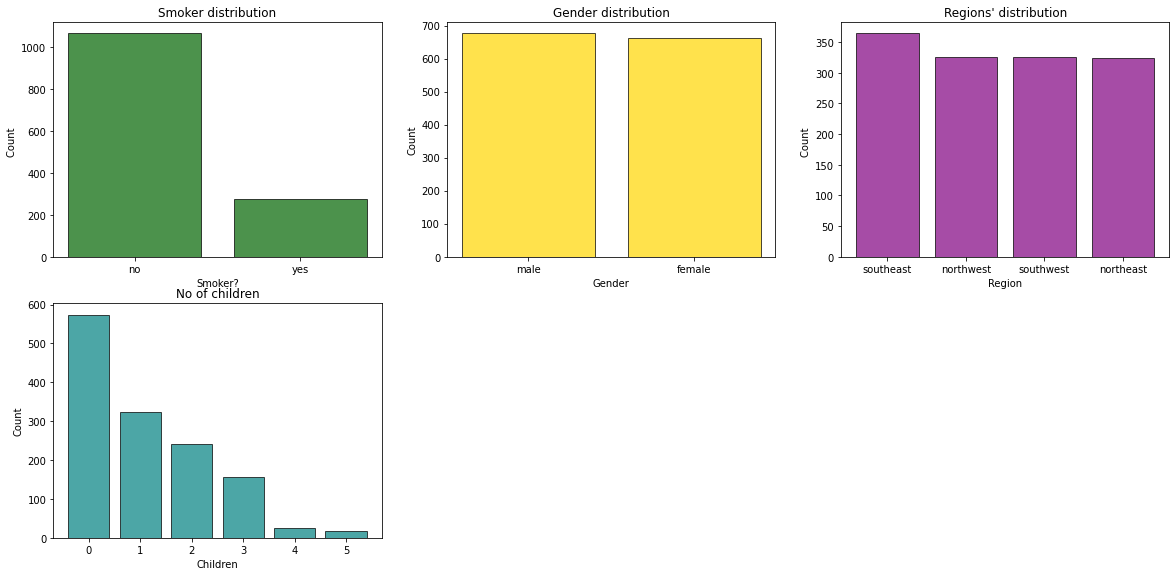

In [ ]:
plt.figure(figsize=(20,25))

x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(5,3,1)
plt.bar(x,y, align='center',color = 'darkgreen',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')
x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(5,3,2)
plt.bar(x1,y1, align='center',color = 'gold',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(5,3,3)
plt.bar(x2,y2, align='center',color = 'purple',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(5,3,4)
plt.bar(x3,y3, align='center',color = 'teal',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('No of children')

plt.show()

1.The Smokers chart indicates that there are more number of non-smokers than smokers

2.The Gender chart shows that the distribution is even

3.The Region chart shows that the instances are evenly distributed across all regions

4.The Children chart shows that the majority have less than 2 children and very few have 4 or 5 children

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


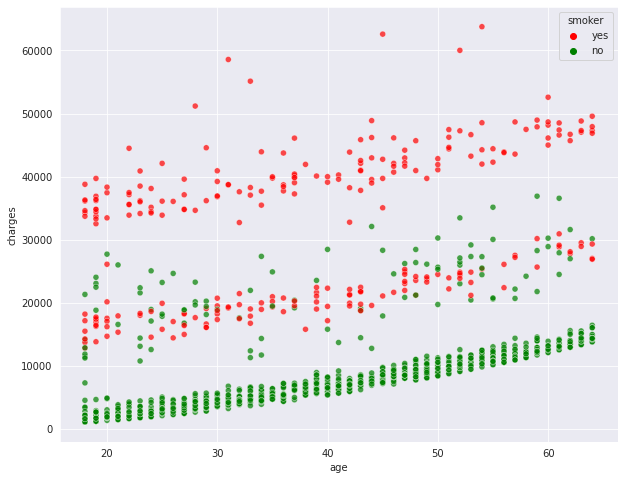

In [ ]:
#Scatter plot to look for dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.7)
plt.show()

Its apparent vishually that the smokers have more charges than the non-smokers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


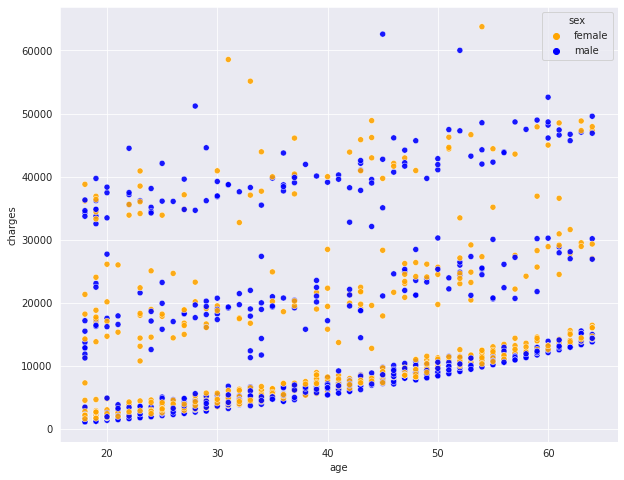

In [ ]:
#Scatter plot to look for dependency between attributes Gender and charges accross different ages
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['orange','blue'],alpha=0.9 )
plt.show()

It is apparent that gender has no considerable effect on the charges however higher age groups seem to have relatively higher charges.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


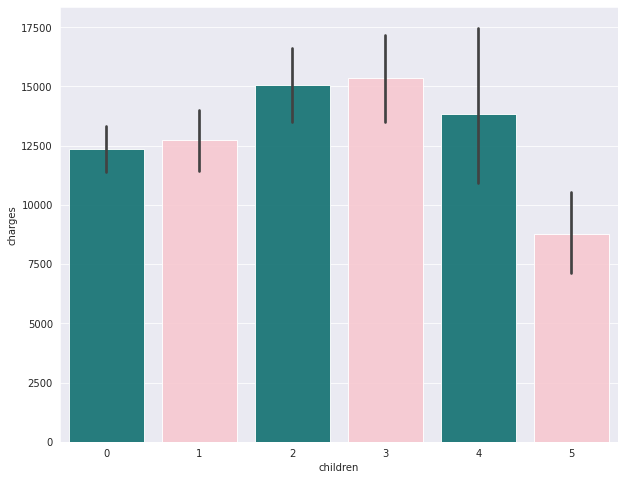

In [ ]:
#Barplot to look for dependency between attributes number of children and charges 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(df.children, df.charges,palette= ['teal','pink'],alpha=0.9 )
plt.show()

It could be inffered that customers with 2 and 3 children have higher chargers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


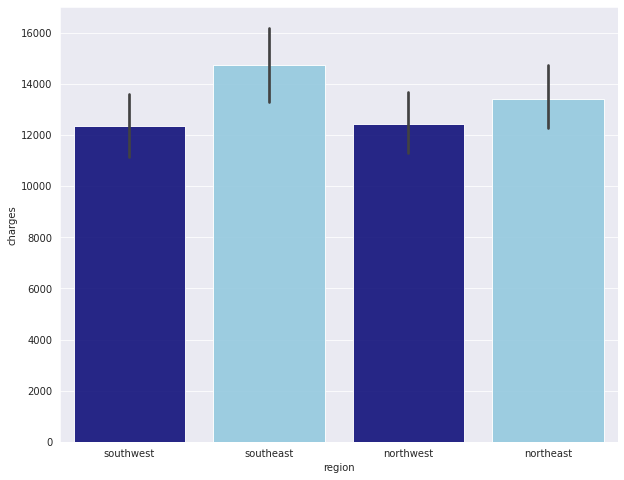

In [ ]:
#Barplot to look for dependency between attributes region and charges 
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.barplot(df.region, df.charges,palette= ['darkblue','skyblue'],alpha=0.9 )
plt.show()

Customers in the southeast region tend to pay more for insurance

## Data Cleaning

In [ ]:
cols=['bmi','charges']

In [ ]:
#Function for Detecting and removing Outliers
for i in cols:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    lowerfence=q1-1.5*IQR
    upperfence=q3+1.5*IQR
    df2 = df[(df[i]<lowerfence) | (df[i]>upperfence)]
    print(i,df2.shape[0])

bmi 9
charges 139


The number of outliers are considerably low with percentages of 0.006% for bmi and 0.1% for charges respectively hence removal not necessary

Correlation Plot


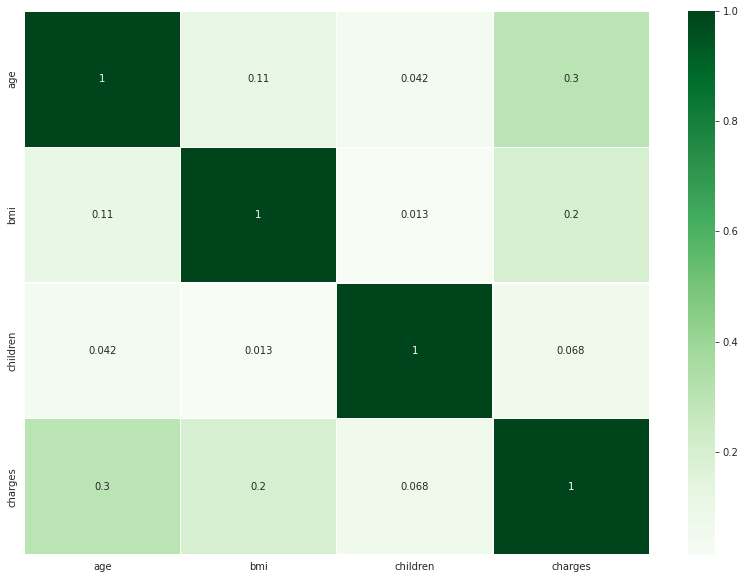

In [ ]:
#Checking for correlation
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,cmap="Greens")

All values are all less than 0.5 indicatingweak correlation

In [ ]:
df2=df.copy()

In [ ]:
df2['charges']=pd.qcut(df['charges'],5)

In [ ]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,"(11399.857, 20260.626]"
1,18,male,33.770,1,no,southeast,"(1121.873, 3991.576]"
2,28,male,33.000,3,no,southeast,"(3991.576, 7369.053]"
3,33,male,22.705,0,no,northwest,"(20260.626, 63770.428]"
4,32,male,28.880,0,no,northwest,"(1121.873, 3991.576]"


In [ ]:
df2['charges'].value_counts()

(20260.626, 63770.428]    268
(7369.053, 11399.857]     268
(1121.873, 3991.576]      268
(11399.857, 20260.626]    267
(3991.576, 7369.053]      267
Name: charges, dtype: int64

In [ ]:
cols=['sex','smoker','region','charges']
for i in cols:
    df2[i]=df2[i].astype('category')

In [ ]:
for i in cols:
    df2[i]=df2[i].cat.codes

In [ ]:
df2.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,2
1334,18,0,31.92,0,0,0,0
1335,18,0,36.85,0,0,2,0
1336,21,0,25.80,0,0,3,0
1337,61,0,29.07,0,1,1,4


# Scaling


In [ ]:
X=df2.drop('charges',axis=1)
y=df2.charges

In [ ]:
#Splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
#Scaling the data to make mean = 0 and  unit variance i.e make the data follow standarnd normal distribution
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


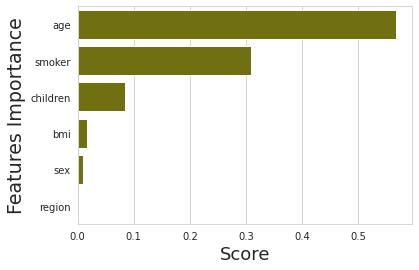

In [ ]:
data=pd.DataFrame()
data['Feature']=X.columns[range(len(fs.scores_))]
data['Scores']=fs.scores_
data=data.sort_values(by='Scores',ascending=False)
sns.barplot(data['Scores'],data['Feature'],color='olive')
sns.set_style('whitegrid')
plt.ylabel('Features Importance',fontsize=19)
plt.xlabel('Score',fontsize=18)
plt.show()

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier().fit(X_train_fs,y_train)

In [ ]:
y_pred_DT=model_DT.predict(X_test_fs)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
acc_score_DT=accuracy_score(y_test,y_pred_DT)
acc_score_DT=round(acc_score_DT*100,2)
print(acc_score_DT)
print(classification_report(y_test, y_pred_DT))

73.88
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        84
           1       0.76      0.79      0.77        67
           2       0.80      0.71      0.75        86
           3       0.69      0.72      0.71        85
           4       0.62      0.76      0.69        80

    accuracy                           0.74       402
   macro avg       0.75      0.74      0.74       402
weighted avg       0.75      0.74      0.74       402



## Random Forest Regression

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
cols=['sex','smoker','region']
for i in cols:
    df[i]=df[i].astype('category')

In [ ]:
for i in cols:
    df[i]=df[i].cat.codes

In [ ]:
X=df.drop('charges',axis=1)
y=df.charges

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators = 7, random_state = 42)
model_rf.fit(X_train_fs, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=7, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = model_rf.predict(X_test_fs)

In [ ]:
print("Actual: ", np.array(y_test))
print("Predicted: ",y_pred)

Actual:  [0 2 2 2 0 4 2 3 0 3 3 3 1 1 0 2 4 1 4 3 2 4 2 2 0 1 2 2 1 0 3 3 4 4 4 2 4
 3 3 4 1 3 3 3 1 4 4 4 2 3 3 3 0 2 3 1 4 3 4 0 0 3 3 0 3 2 2 4 0 3 4 4 0 3
 3 4 0 0 2 2 0 3 2 0 4 4 1 4 2 2 3 4 3 2 0 2 2 3 3 1 2 3 3 4 4 3 0 2 0 2 1
 0 0 3 3 0 1 3 3 0 2 2 1 1 4 2 3 3 4 2 4 0 1 4 4 0 0 0 2 2 3 1 3 3 3 2 0 2
 0 1 1 0 4 3 2 1 2 2 2 0 0 4 3 0 1 0 4 2 2 1 1 0 4 4 0 1 0 3 0 1 3 3 2 2 0
 3 0 2 2 2 3 4 0 0 1 2 1 0 3 2 1 2 3 4 1 0 1 1 0 3 1 4 3 0 1 4 2 4 0 4 0 4
 3 1 0 0 1 2 3 3 0 3 4 1 3 2 3 0 2 1 2 0 4 0 4 4 3 2 3 3 2 1 3 2 0 0 4 4 0
 4 2 1 2 4 4 4 0 1 2 2 0 3 2 2 1 4 1 1 3 3 0 2 1 0 2 2 3 4 0 1 2 4 3 2 0 4
 1 4 0 1 1 2 0 1 1 4 1 1 0 1 1 0 3 0 1 3 3 2 3 2 2 3 0 1 3 0 3 1 1 4 3 2 4
 0 4 0 0 1 3 3 4 0 4 0 2 4 1 0 0 2 0 0 2 4 3 2 2 4 2 0 1 2 2 2 1 2 4 4 1 4
 4 2 1 4 1 2 3 0 1 3 1 3 4 4 4 4 3 0 1 3 4 4 2 4 4 4 2 3 0 0 3 4]
Predicted:  [0.         2.71428571 2.         2.         0.         4.
 2.         2.85714286 0.         3.57142857 3.14285714 2.71428571
 1.         1.         0.42857143 2.5

In [ ]:
from sklearn import metrics
print(cl("R Squared: ",attrs=['bold']),model_rf.score(X_test_fs, y_test))
rf_pred = model_rf.predict(X)
print(cl('Mean Squared Error:',attrs=['bold']), metrics.mean_squared_error(y_test, y_pred))
print(cl('Root Mean Squared Error:',attrs=['bold']), np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(cl('Mean Absolute Error:',attrs=['bold']), metrics.mean_absolute_error(y_test, y_pred))

R Squared:  0.7610145229577067
Mean Squared Error: 0.4802010356381358
Root Mean Squared Error: 0.6929653928141981
Mean Absolute Error: 0.3663823738450604


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


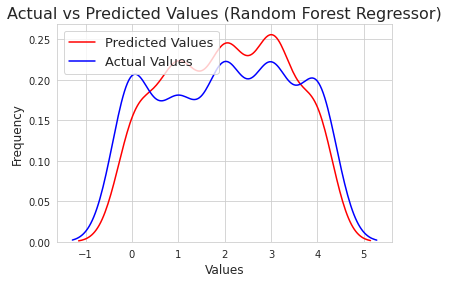

In [ ]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values (Random Forest Regressor)', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_fs, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lr = lr.predict(X_test_fs)

In [ ]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

In [ ]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test_fs, y_test))

R-Squared : 0.7434451686363912


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


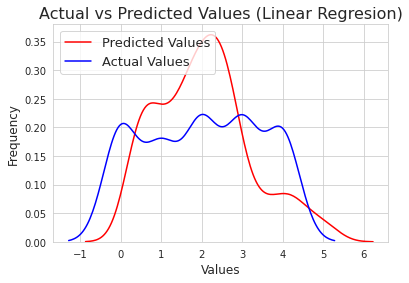

In [ ]:
# Visualizing Prediction Accuracy
sns.distplot(y_pred_lr, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values (Linear Regresion)', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### OLS Model

In [ ]:
import statsmodels.api as sm

In [ ]:
#Splitting into dependent and independent variables
X=df2.drop('charges',axis=1)
y=df2.charges
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     559.9
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:58:32   Log-Likelihood:                -1520.1
No. Observations:                1338   AIC:                             3054.
Df Residuals:                    1331   BIC:                             3091.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9069      0.119     -7.614      0.000      -1.141      -0.673
age            0.0549      0.001     37.034      0.000       0.052       0.058
sex           -0.0775      0.042     -1.869      0.062      -0.159       0.004
bmi            0.0105      0.003      3.045      0.002       0.004       0.017
children       0.0986      0.017      5.746      0.000       0.065       0.132
smoker         2.2640      0.051     44.084      0.000       2.163       2.365
region        -0.0662      0.019     -3.495      0.000      -0.103      -0.029
==============================================================================
Omnibus:                      509.099   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1907.256
Skew:                           1.848   Prob(JB):                         0.00
Kurtosis:                       7.534   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Removing 'Sex' variable as the p-value is higher that 0.05

In [ ]:
X=df2.drop(['charges','sex'],axis=1)
y=df2.charges
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     669.9
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        07:58:32   Log-Likelihood:                -1521.9
No. Observations:                1338   AIC:                             3056.
Df Residuals:                    1332   BIC:                             3087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9373      0.118     -7.936      0.000      -1.169      -0.706
age            0.0550      0.001     37.058      0.000       0.052       0.058
bmi            0.0102      0.003      2.955      0.003       0.003       0.017
children       0.0981      0.017      5.709      0.000       0.064       0.132
smoker         2.2568      0.051     44.028      0.000       2.156       2.357
region        -0.0661      0.019     -3.486      0.001      -0.103      -0.029
==============================================================================
Omnibus:                      505.436   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1872.200
Skew:                           1.838   Prob(JB):                         0.00
Kurtosis:                       7.480   Cond. No.                         293.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred_ols=model.predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


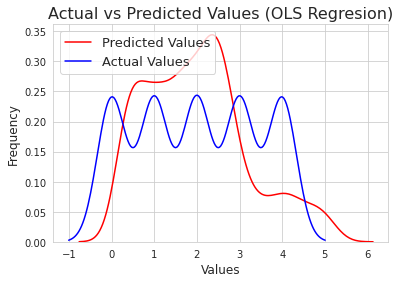

In [ ]:
# Visualizing Prediction Accuracy
sns.distplot(y_pred_ols, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values (OLS Regresion)', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

The Random Forest Regressor proved to be the best fit model for the given dataset with Rsquare value 0.7610 i.e the model explains 71% variablility of the Charges of the insurance.